# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 89.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [6]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [7]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [8]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [9]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [10]:
df_fatalities[df_fatalities.isnull().any(axis=1)]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,110,William Campbell,25/01/15,shot,gun,59.00,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
241,244,John Marcell Allen,30/03/15,shot,gun,54.00,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,534,Mark Smith,09/04/15,shot and Tasered,vehicle,54.00,M,NaN,Kellyville,OK,False,attack,Other,False
340,433,Joseph Roy,07/05/15,shot,knife,72.00,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.00,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False


In [11]:
df_fatalities.duplicated().values.any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate.str.replace("-", ""))
poverty_by_state = df_pct_poverty.groupby("Geographic Area").agg({"poverty_rate": pd.Series.mean})
poverty_by_state.sort_values("poverty_rate", ascending=False, inplace=True)

In [13]:
fig = px.bar(x=poverty_by_state.index, y=poverty_by_state.poverty_rate, labels={"x": "State", "y": "Poverty rate, %"},
             title="States' average poverty rate")
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [14]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs.str.replace("-", ""))
gr_by_state = df_pct_completed_hs.groupby("Geographic Area").agg({"percent_completed_hs": pd.Series.mean})
gr_by_state.sort_values("percent_completed_hs", ascending=False, inplace=True)

fig = px.bar(x=gr_by_state.index, y=gr_by_state.percent_completed_hs, labels={"x": "State", "y": "Completed High School, %"},
             title="States' average high school completion rate")
fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [15]:
poverty_gr_state = pd.merge(poverty_by_state, gr_by_state, left_index=True, right_index=True)
poverty_gr_state.head()

,poverty_rate,percent_completed_hs
Geographic Area,,
MS,26.88,78.47
AZ,25.67,80.47
GA,23.78,79.01
NM,23.08,80.98
AR,22.96,79.95


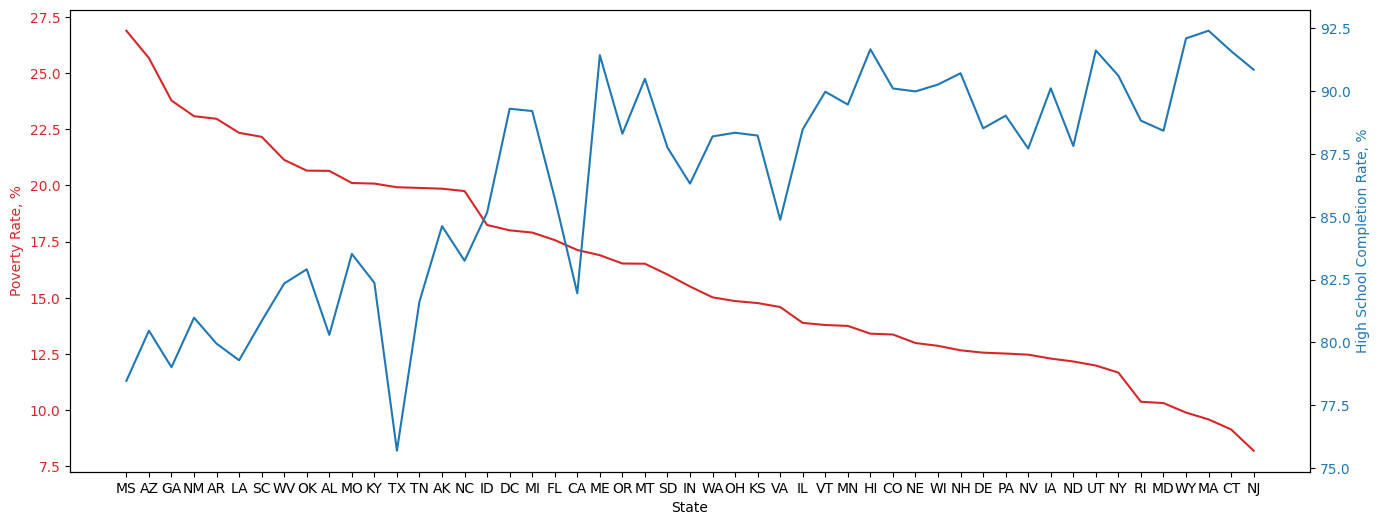

In [16]:
fig, ax1 = plt.subplots(figsize=(16, 6))

color = 'tab:red'
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate, %', color=color)
ax1.plot(poverty_gr_state.index, poverty_gr_state.poverty_rate, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('High School Completion Rate, %', color=color)
ax2.plot(poverty_gr_state.index, poverty_gr_state.percent_completed_hs, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

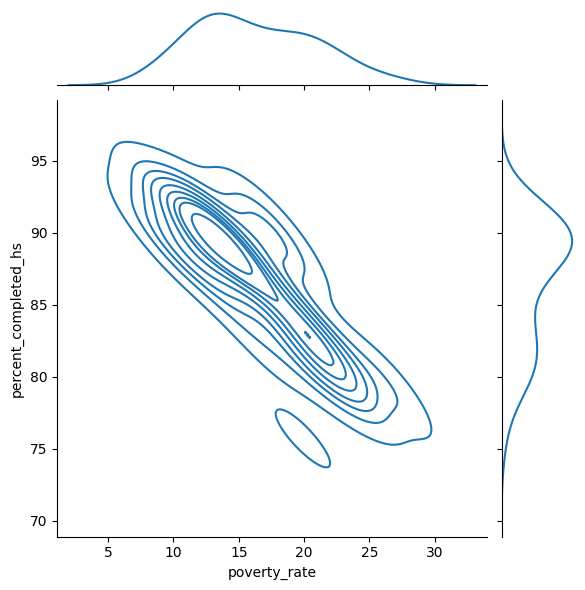

In [17]:
sns.jointplot(x=poverty_gr_state.poverty_rate, y=poverty_gr_state.percent_completed_hs, kind="kde")

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

<Axes: xlabel='poverty_rate', ylabel='percent_completed_hs'>

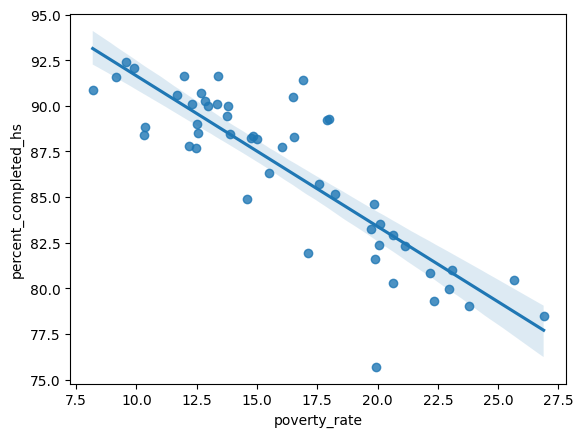

In [18]:
sns.regplot(x=poverty_gr_state.poverty_rate, y=poverty_gr_state.percent_completed_hs)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [20]:
race_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
df_share_race_city[race_columns] = df_share_race_city[race_columns].apply(lambda x: x.str.replace('(X)', '').apply(pd.to_numeric))
df_share_race_city[race_columns] = df_share_race_city[race_columns].div(df_share_race_city[race_columns].sum(axis=1), axis=0).multiply(100)
share_race_by_state = df_share_race_city.drop("City", axis=1).groupby("Geographic area", as_index=False).mean()
share_race_by_state = share_race_by_state.melt(id_vars=['Geographic area'], value_vars=race_columns, var_name='race', value_name='share')
share_race_by_state.race = share_race_by_state.race.str.replace("share_", "").str.split("_").str.join(' ').str.title()
share_race_by_state.sort_values("Geographic area").head(10)

,Geographic area,race,share
0,AK,White,47.79
102,AK,Native American,47.96
153,AK,Asian,1.43
204,AK,Hispanic,2.23
51,AK,Black,0.58
103,AL,Native American,0.66
205,AL,Hispanic,2.92
52,AL,Black,23.35
154,AL,Asian,0.48
1,AL,White,72.59


In [21]:
fig = px.bar(share_race_by_state, x="Geographic area", y="share", color="race", title="Racial Makeup of Each US State")
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [22]:
fatalities_by_race = df_fatalities.race.value_counts()
fatalities_by_race

,count
race,
W,1201
B,618
H,423
A,39
N,31
O,28


In [23]:
fig = px.pie(names=fatalities_by_race.index, values=fatalities_by_race.values, hole=0.6, title="People Killed by Each Race")
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [24]:
fatalities_by_gender = df_fatalities.gender.value_counts()
fatalities_by_gender

,count
gender,
M,2428
F,107


In [25]:
fig = px.pie(names=fatalities_by_gender.index, values=fatalities_by_gender.values, title="Total Number of Deaths of Men and Women")
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [26]:
fatalities_male = df_fatalities[df_fatalities.gender == 'M']
fatalities_male

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [27]:
fatalities_female = df_fatalities[df_fatalities.gender == 'F']
fatalities_female

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
8,16,Autumn Steele,06/01/15,shot,unarmed,34.00,F,W,Burlington,IA,False,other,Not fleeing,True
51,100,Kristiana Coignard,22/01/15,shot and Tasered,knife,17.00,F,W,Longview,TX,True,other,Not fleeing,False
60,20,Jessie Hernandez,26/01/15,shot,vehicle,17.00,F,H,Denver,CO,False,other,Not fleeing,False
67,111,Tiffany Terry,27/01/15,shot,knife,39.00,F,W,Omaha,NE,True,attack,Not fleeing,False
80,118,Yuvette Henderson,03/02/15,shot,gun,38.00,F,B,Emeryville,CA,False,attack,Car,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,2743,Tiffany Lynn Potter,05/07/17,shot,gun,29.00,F,W,Des Moines,IA,False,attack,Foot,True
2474,2760,Tina Medlin,08/07/17,shot,gun,50.00,F,W,Newton Grove,NC,False,attack,Not fleeing,False
2494,2779,Justine Damond,15/07/17,shot,unarmed,40.00,F,W,Minneapolis,MN,False,undetermined,Not fleeing,False
2497,2782,India N. Nelson,17/07/17,shot,gun,25.00,F,NaN,Norfolk,VA,False,attack,Not fleeing,False


In [28]:
fig = px.box(fatalities_male, x='manner_of_death', y='age', title='Manner of Death by Age (Male)')
fig.show()

In [29]:
fig = px.box(fatalities_female, x='manner_of_death', y='age', title='Manner of Death by Age (Female)')
fig.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [30]:
armed_percentage = len(df_fatalities[df_fatalities.armed != 'unarmed']) / len(df_fatalities) * 100
print(f'People were armed in {armed_percentage:.2f}% of police killings')

People were armed in 93.25% of police killings


In [31]:
armed_distribution = df_fatalities.armed.value_counts()
armed_distribution

,count
armed,
gun,1398
knife,373
vehicle,177
unarmed,171
undetermined,117
toy weapon,104
machete,18
unknown weapon,18
ax,9


In [32]:
fig = px.bar(x=armed_distribution.index, y=armed_distribution.values, log_y=True)
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [33]:
under_25years = df_fatalities[df_fatalities.age < 25]
print(f'{round(len(under_25years) / len(df_fatalities) * 100, 2)}% of people killed were under 25 years old')

17.75% of people killed were under 25 years old


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

<Axes: xlabel='age', ylabel='Count'>

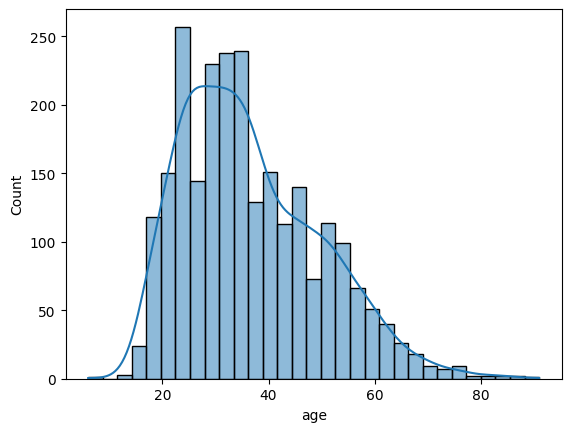

In [34]:
sns.histplot(df_fatalities, x='age', kde=True)

Create a seperate KDE plot for each race. Is there a difference between the distributions?

<Axes: xlabel='age', ylabel='Density'>

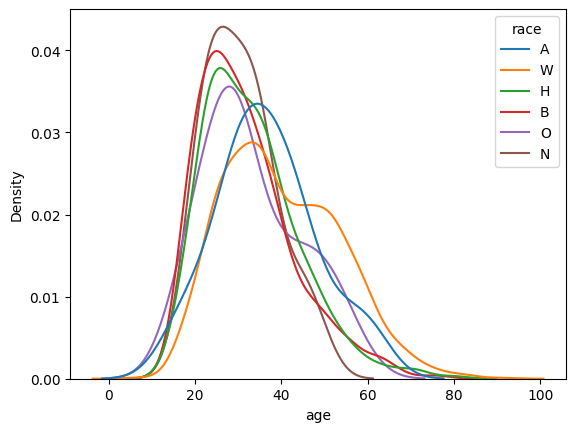

In [35]:
sns.kdeplot(data=df_fatalities, x='age', hue='race', common_norm=False)

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [36]:
killed_by_race = df_fatalities.race.value_counts(ascending=True)
killed_by_race

,count
race,
O,28
N,31
A,39
H,423
B,618
W,1201


In [37]:
fig = px.bar(x=killed_by_race.values, y=killed_by_race.index, orientation='h', title="Total Number of People Killed by Race", labels={"x": "People killed", "y": "Race"})
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [38]:
f'{(df_fatalities.signs_of_mental_illness.sum() / len(df_fatalities))*100:.2f}% of people killed by police have been diagnosed with a mental illness'

'24.97% of people killed by police have been diagnosed with a mental illness'

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [39]:
kills_by_cities = df_fatalities.groupby("city", as_index=False).agg(killings=("id", pd.Series.count))
top10_cities = kills_by_cities.sort_values("killings").tail(10)
top10_cities

,city,killings
1217,St. Louis,15
808,Miami,18
60,Austin,18
284,Columbus,19
1118,San Antonio,20
687,Las Vegas,21
241,Chicago,25
578,Houston,27
995,Phoenix,31
732,Los Angeles,39


In [40]:
fig = px.bar(top10_cities, x="killings", y="city", orientation='h', title="Top 10 Cities with the Most Police Killings")
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [41]:
cities_races_killed = df_fatalities.groupby(["city", "race"], as_index=False).agg(killings=("id", pd.Series.count))
top10_cities_kills_by_races = pd.merge(cities_races_killed, top10_cities, on="city").sort_values("killings_y")
top10_cities_kills_by_races.head()

,city,race,killings_x,killings_y
32,St. Louis,W,3,15
31,St. Louis,B,11,15
23,Miami,W,3,18
22,Miami,H,6,18
21,Miami,B,8,18


In [42]:
fig = px.bar(top10_cities_kills_by_races, x="killings_x", y="city", color="race", orientation='h', title="Top 10 Cities with the Most Police Killings by Race")
fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [43]:
kills_by_states = df_fatalities.groupby("state").agg(killings=("id", pd.Series.count))
kills_by_states.head()

,killings
state,
AK,15
AL,50
AR,26
AZ,118
CA,424


In [44]:
fig = px.choropleth(locations=kills_by_states.index, locationmode="USA-states", color=kills_by_states.killings, scope="usa", title="Map of Police Killings by US State")
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [45]:
df_fatalities.date

,date
0,02/01/15
1,02/01/15
2,03/01/15
3,04/01/15
4,04/01/15
5,04/01/15
6,05/01/15
7,06/01/15
8,06/01/15
9,06/01/15


In [46]:
df_fatalities.date = pd.to_datetime(df_fatalities.date, format='%d/%m/%y')
df_fatalities.date

,date
0,2015-01-02
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-04
5,2015-01-04
6,2015-01-05
7,2015-01-06
8,2015-01-06
9,2015-01-06


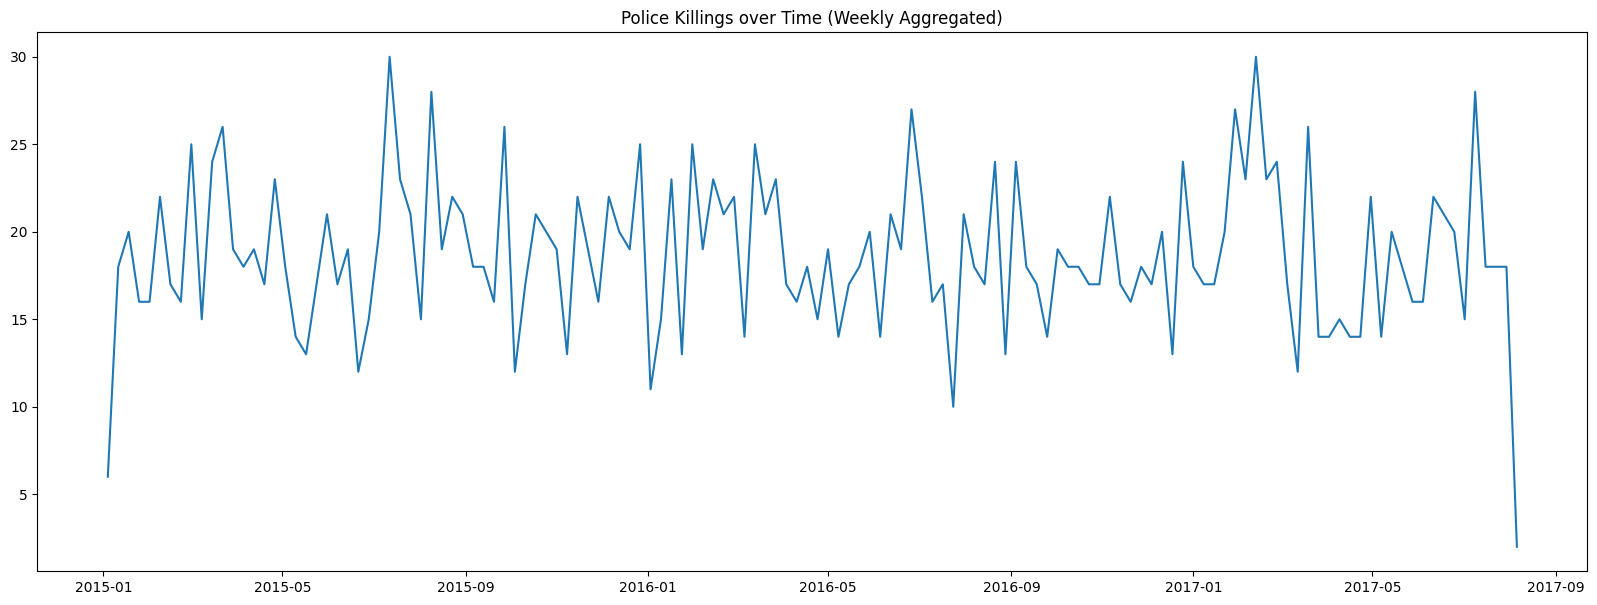

In [47]:
killings_by_date = df_fatalities.groupby('date').agg(killings=("id", pd.Series.count)).resample('W').sum()
plt.figure(figsize=(20, 7))
plt.plot(killings_by_date.index, killings_by_date.killings)
plt.title("Police Killings over Time (Weekly Aggregated)")
plt.show()

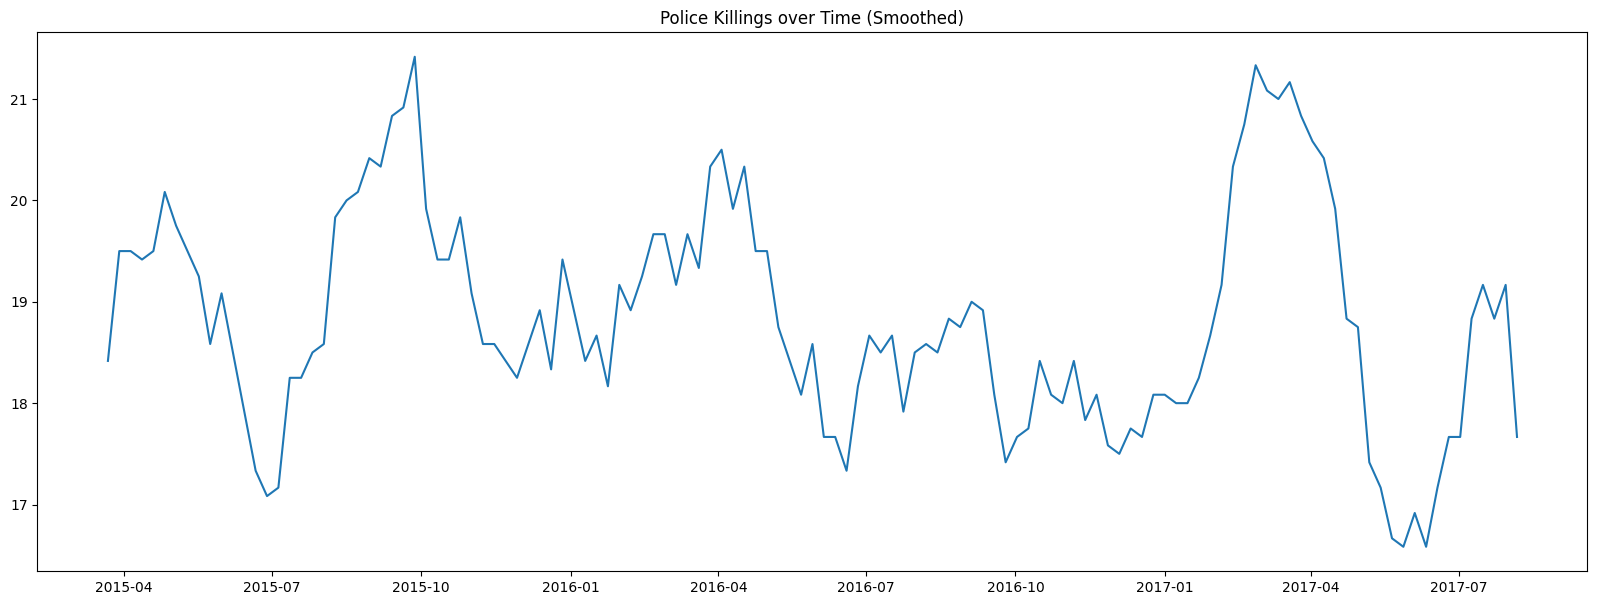

In [48]:
killings_by_date_roll = killings_by_date.rolling(window=12).mean()
plt.figure(figsize=(20, 7))
plt.plot(killings_by_date_roll.index, killings_by_date_roll.killings)
plt.title("Police Killings over Time (Smoothed)")
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).